In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('spam_01.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [3]:
# As I can see that there are 5 columns but starting 2 columns are useful. So, last three columns will be delete.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Here only useful columns shows
df.drop( columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [5]:
df.sample(5)

,v1,v2
560,ham,Hi msg me:)i'm in office..
2171,ham,I wont. So wat's wit the guys
1609,ham,You all ready for * big day tomorrow?
4,ham,"Nah I don't think he goes to usf, he lives aro..."
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...


In [6]:
# Rename the column names
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace= True)
df.sample(5)

,Target,Text
3128,ham,"Haha better late than ever, any way I could sw..."
753,ham,When did you get to the library
1116,ham,Hey... What time is your driving on fri? We go...
2058,ham,Ugh fuck it I'm resubbing to eve
237,ham,Where are you?when wil you reach here?


In [7]:
# Now, we are change the ham -> 0 and spam -> 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['Target'] = encoder.fit_transform(df['Target'])

In [9]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check Missing values 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
# Check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates 
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# EDA

In [13]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

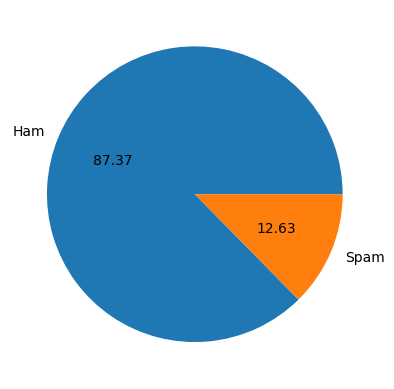

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Kaif
[nltk_data]     Ansari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# No. of characters in dataset
df['Num_Char'] = df['Text'].apply(len)
df.head()

,Target,Text,Num_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
# No. of words in dataset
df['Num_Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,Num_Char,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
# No. of sentence in dataset
df['Num_Sent'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Num_Char,Num_Words,Num_Sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['Num_Char', 'Num_Words', 'Num_Sent']].describe()

,Num_Char,Num_Words,Num_Sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


# Data Preprocessing

Lower Case<br>
Tokenization - Convert the text into smaller parts<br> 
Removing special characters<br>
Removing stop words and punctuation<br>
stemming/Lemmatization - Dance, Dancing, Danced convert in Dance<br>

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y) 

In [21]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [22]:
df["Transformed_Text"] = df['Text'].apply(transform_text)
df.head()

,Target,Text,Num_Char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [24]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_Text'].str.cat(sep=' '))

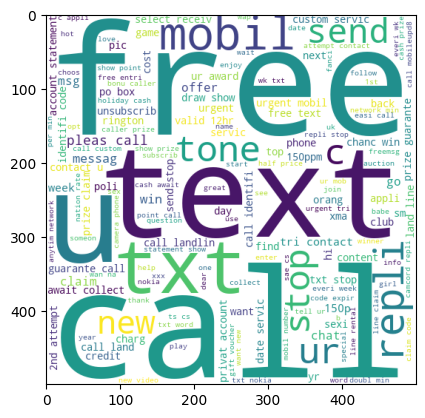

In [25]:
plt.imshow(spam_wc)

# Model Building

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [39]:
X = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [40]:
y = df['Target'].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

In [43]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [44]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [45]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [46]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [47]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [48]:
import pickle 
pickle.dump(tfidf, open('Vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))